# Lab 2: Clustering

Welcome to the advanced Machine Learning Course.

The objective of this lab session is to code a few regression algorithms and to apply them to synthetic and real datasets.

Please put **"ML - MSc - TD2"** in the mail subject or I might lose your work (which means 0) and send it to pierre.houdouin@centralesupelec.fr

Please label your notebook **"L2_familyname1_familyname2.ipynb"** or I might lose your work (which means 0).

We begin with the standard imports:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster # all clustering techniques except hdbscan
%matplotlib inline
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}

We will have two toy datasets to try the different methods:

There are a lot of clustering algorithms to choose from the `sklearn` library. So what clustering algorithms should you be using? It depends.

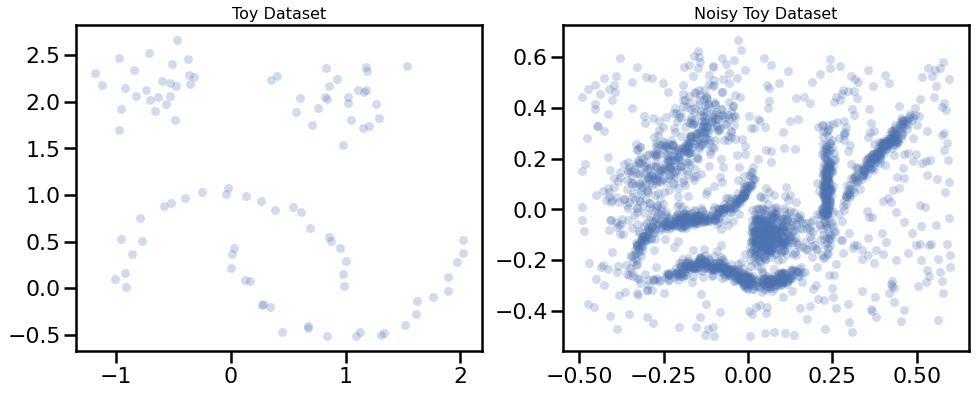

In [2]:
import sklearn.datasets as data
moons, _ = data.make_moons(n_samples=50, noise=0.05)
blobs, _ = data.make_blobs(n_samples=50, centers=[(-0.75,2.25), (1.0, 2.0)], cluster_std=0.25)
test_data_0 = np.vstack([moons, blobs])

test_data_1 = np.load('clusterable_data.npy')

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].scatter(test_data_0.T[0], test_data_0.T[1], c='b', **plot_kwds)
ax[0].set_title('Toy Dataset', size=16)

ax[1].scatter(test_data_1.T[0], test_data_1.T[1], color='b', **plot_kwds)
ax[1].set_title('Noisy Toy Dataset', size=16)

plt.show();

In [3]:
from scipy.spatial import distance
from scipy.cluster.hierarchy import linkage, dendrogram



## K-means

K-Means is the 'go-to' clustering algorithm for many simply because it is fast, easy to understand, and available everywhere (there's an implementation in almost any statistical or machine learning tool you care to use). However, K-Means has a few problems caused by its simplicity. 

We try the `sklearn` implementation in our toy datasets:

## Aglomerative Single Linkage clustering

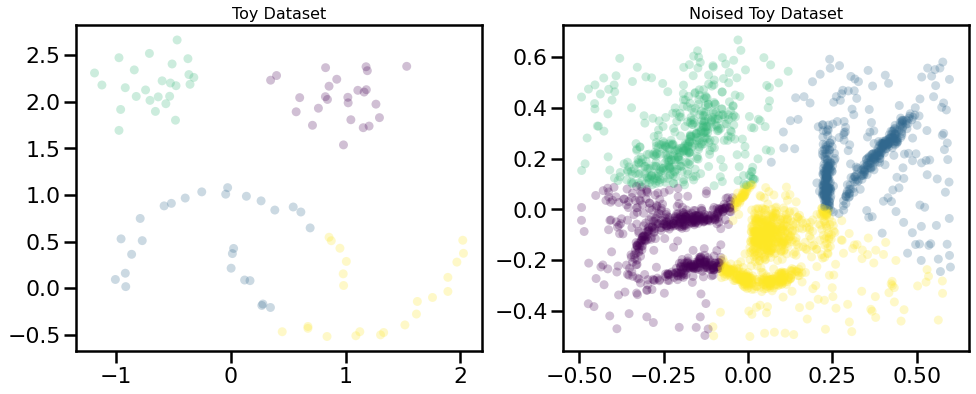

In [4]:
from sklearn.cluster import KMeans
kmeans_0 = KMeans(n_clusters=4, max_iter=200).fit(test_data_0)
kmeans_1 = KMeans(n_clusters=4, max_iter=200).fit(test_data_1)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].scatter(test_data_0.T[0], test_data_0.T[1], c=kmeans_0.labels_ , **plot_kwds)
ax[0].set_title('Toy Dataset', size=16)

ax[1].scatter(test_data_1.T[0], test_data_1.T[1], c=kmeans_1.labels_, **plot_kwds)
ax[1].set_title('Noised Toy Dataset', size=16)


plt.show();

Agglomerative clustering is a suite of algorithms all based on the same idea. The fundamental idea is that you start with each point in it's own cluster and then, for each cluster, use some criterion to choose another cluster to merge with. Do this repeatedly until you have only one cluster and you get get a hierarchy, or binary tree, of clusters branching down to the last layer which has a leaf for each point in the dataset. The most basic version of this, single linkage, chooses the closest cluster to merge, and hence the tree can be ranked by distance as to when clusters merged/split.

**Code your own Aglomerative Single Linkage clustering algorithm**!:

- Fill in the class 
- During the process, keep track of the cluster merges by saving a (num_samples-1,4) np.array being a linkage matrix in scypy format (to use their function to plot dendrogram: `scipy.cluster.hierarchy.dendrogram`). check documentation.

In [5]:
class my_SingleLinkageAglomerativeClustering():
    
    def __init__(self, metric="euclidean", n_clusters=3, linkage = 'single'):
        '''
        Attributes:
        
        metric_: {"euclidean","precomputed"}
            the distance to be used
            if precomputed then X is distance matrix
        n_clusters: integer
            number of clusters to return 
        linkage_matrix_: (n-1, 4) np.array
            in the same format as linkage  
        labels_: integer np.array
            label assigment
        hierarchy_: list of np.array
            each array corresponds to label assigment
            at each level (number of clusters)
            hierarchy_[0]=np.array(list(range(n)))
        '''
        self.metric_ = metric
        self.n_clusters_ = n_clusters
        self.linkage_matrix_ = None
        self.labels_ = None
        self.hierarchy_ = None
        self.linkage = linkage
        
    def fit(self, X):
        """ Create a hierarchy of clusters
        
        Parameters:
        -----------
        X: (n, p) np.array
            Data matrix
        
        Returns:
        -----
        self: my_SingleLinkageAglomerativeClustering
            to have access to labels_
        """
        # if it's not precomputed compute the distance matrix
        # using from scipy.spatial import distance 
        
        # HINT:
        # You can use a minimum spanning tree and add merge in increasing order
        # or modifying the distance matrix 
        # (add row/column for new clusters and remove/put zero in old row/colums)
        
        # keep track of merges in linkage_matrix_ and labels in hierarchy_
        
        # update labels_ from the hierarchy level selected by n_clusters_ 
        
        #code below
        
        # If metric is "euclidean," compute the distance matrix
        if self.metric_ == "euclidean":
            distance_matrix = distance.cdist(X, X, 'euclidean')
            np.fill_diagonal(distance_matrix, np.inf)
        elif self.metric_ == "precomputed":
            # Assuming X is already a precomputed distance matrix
            distance_matrix = X
            np.fill_diagonal(distance_matrix, np.inf)
        else:
            raise ValueError("Invalid metric. Use 'euclidean' or 'precomputed'.")

        n_rows = len(distance_matrix)
        self.linkage_matrix_ = np.zeros((n_rows, 4))
        self.linkage_matrix_[:, 0] = np.arange(n_rows)
        self.linkage_matrix_[:, 3] = 1
        # Create an array to store cluster assignments for each data point
        cluster_label_matrix = np.arange(n_rows).reshape(1, -1)

        num_elements_in_cluster = 1
        
        while num_elements_in_cluster < n_rows:
            min_indices = np.unravel_index(np.nanargmin(distance_matrix), distance_matrix.shape)
            min_row_idx, min_col_idx = min_indices
            dist_xy = distance_matrix[min_row_idx, min_col_idx]

            new_distance_row = np.zeros(len(distance_matrix))

            for point in range(len(distance_matrix)):
                if self.linkage == 'single':
                    #print("Single Linkage")
                    
                    new_distance_row[point] = min(distance_matrix[min_row_idx, point], distance_matrix[min_col_idx, point])
            
            #For complete linkage, taking the maximum distance
            
                elif self.linkage == 'complete':
                    #print("Complete linkage")
                    new_distance_row[point] = max(distance_matrix[min_row_idx, point], distance_matrix[min_col_idx, point])
                    
                elif self.linkage == 'average':
                
                    
                    #print("Average linkage")
            # For average linkage, update the new distance row as follows:
                    size_x = self.linkage_matrix_[min_row_idx,3]
                    size_y = self.linkage_matrix_[min_col_idx,3]
                    #size_point = self.linkage_matrix[point,3]
                    new_distance_row[point] = (size_x* distance_matrix[min_row_idx, point] + size_y* distance_matrix[min_col_idx, point])/ ((size_x + size_y))
                
            distance_matrix = np.vstack((distance_matrix, new_distance_row))
            new_distance_column = np.append(new_distance_row, np.nan)
            distance_matrix = np.hstack((distance_matrix, new_distance_column.reshape(-1, 1)))

            distance_matrix[min_row_idx, :] = np.nan
            distance_matrix[min_col_idx, :] = np.nan
            distance_matrix[:, min_col_idx] = np.nan
            distance_matrix[:, min_row_idx] = np.nan

            num_elements_in_cluster = self.linkage_matrix_[min_row_idx, 3] + self.linkage_matrix_[min_col_idx, 3]
            #print(f"number of elements in cluster = {num_elements_in_cluster}, new cluster = {(min_row_idx, min_col_idx)}, dist = {dist_xy}")

            # Update cluster assignments
            new_row_label = cluster_label_matrix[-1, :].copy()
            for i in range(len(new_row_label)):
                if new_row_label[i] in min_indices:
                    new_row_label[i] = len(distance_matrix) - 1

            cluster_label_matrix = np.vstack((cluster_label_matrix, new_row_label))
    
            # Create a new row for the linkage matrix
            new_row = np.array([min_row_idx, min_col_idx, dist_xy, num_elements_in_cluster])

            # Add the new row to the self.linkage_matrix_
            self.linkage_matrix_= np.vstack((self.linkage_matrix_, new_row))
            
        self.hierarchy_ = cluster_label_matrix.copy()
        self.labels_ = self.hierarchy_[- self.n_clusters_]
        self.linkage_matrix_ = self.linkage_matrix_[n_rows:, :]
        unique_clusters = np.unique(self.labels_)

        # Create a dictionary to map cluster labels to new names
        cluster_names = {cluster: i + 1 for i, cluster in enumerate(unique_clusters)}

        # Rename the labels using the dictionary
        renamed_labels = np.array([cluster_names[cluster] for cluster in self.labels_])   
        
        self.labels_ = renamed_labels
        
        return self.labels_
            
        
    def plot_dendrogram(self):
        '''Use self.linkage_matrix_ in `scipy.cluster.hierarchy.dendrogram` 
        to plot the dendrogram of the hierarchical structure
        ''' 
        fig = plt.figure(figsize=(25, 10))
        dn = dendrogram(self.linkage_matrix_)
        plt.show      

Apply the method to our toy datasets

In [6]:
clustering_single = my_SingleLinkageAglomerativeClustering(n_clusters=4)
clusters_toy_data_0 = clustering_single.fit(test_data_0)
clusters_toy_data_1 = clustering_single.fit(test_data_1)

print('single linkade done')

clustering_complete = my_SingleLinkageAglomerativeClustering(n_clusters=4, linkage= 'complete')
clusters_toy_data_0_complete = clustering_complete.fit(test_data_0)
clusters_toy_data_1_complete = clustering_complete.fit(test_data_1)

print('Complete linkage done')

clustering_average = my_SingleLinkageAglomerativeClustering(n_clusters=4, linkage= 'average')
clusters_toy_data_0_average = clustering_average.fit(test_data_0)
clusters_toy_data_1_average = clustering_average.fit(test_data_1)

print('Average linkage done')

single linkade done
Complete linkage done
Average linkage done


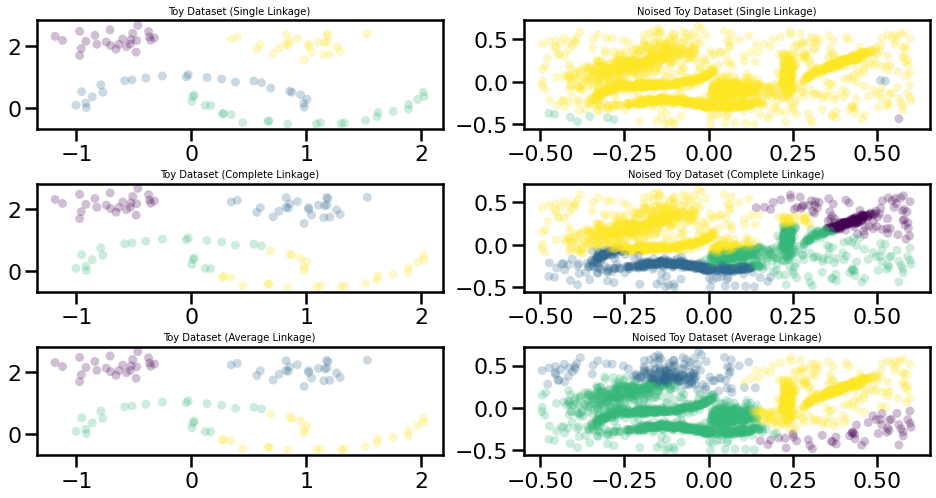

In [7]:
fig, ax = plt.subplots(3, 2, figsize=(16, 8))

# Plot the first toy dataset
ax[0, 0].scatter(test_data_0.T[0], test_data_0.T[1], c=clusters_toy_data_0, **plot_kwds)
ax[0, 0].set_title('Toy Dataset (Single Linkage)', size=10)

# Plot the second toy dataset
ax[0, 1].scatter(test_data_1.T[0], test_data_1.T[1], c=clusters_toy_data_1, **plot_kwds)
ax[0, 1].set_title('Noised Toy Dataset (Single Linkage)', size=10)

# Plot the first toy dataset with complete linkage
ax[1, 0].scatter(test_data_0.T[0], test_data_0.T[1], c=clusters_toy_data_0_complete, **plot_kwds)
ax[1, 0].set_title('Toy Dataset (Complete Linkage)', size=10)

# Plot the second toy dataset with complete linkage
ax[1, 1].scatter(test_data_1.T[0], test_data_1.T[1], c=clusters_toy_data_1_complete, **plot_kwds)
ax[1, 1].set_title('Noised Toy Dataset (Complete Linkage)', size=10)

# Plot the first toy dataset with average linkage
ax[2, 0].scatter(test_data_0.T[0], test_data_0.T[1], c=clusters_toy_data_0_average, **plot_kwds)
ax[2, 0].set_title('Toy Dataset (Average Linkage)', size=10)

# Plot the second toy dataset with average linkage
ax[2, 1].scatter(test_data_1.T[0], test_data_1.T[1], c=clusters_toy_data_1_average, **plot_kwds)
ax[2, 1].set_title('Noised Toy Dataset (Average Linkage)', size=10)


# Adjust the subplot spacing
plt.subplots_adjust(hspace=0.5)

# Show the plot
plt.show()

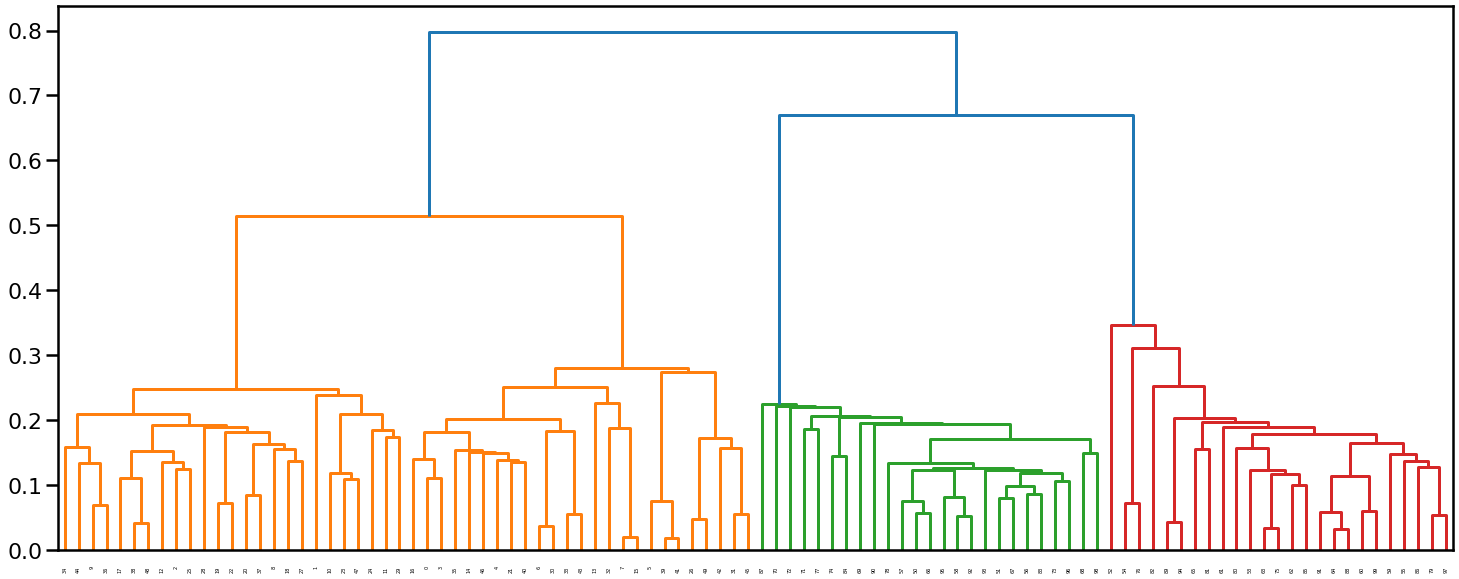

In [8]:
from scipy.spatial import distance 
from scipy.cluster.hierarchy import dendrogram

clusters_toy_data_0 = clustering_single.fit(test_data_0)
clustering_single.plot_dendrogram()

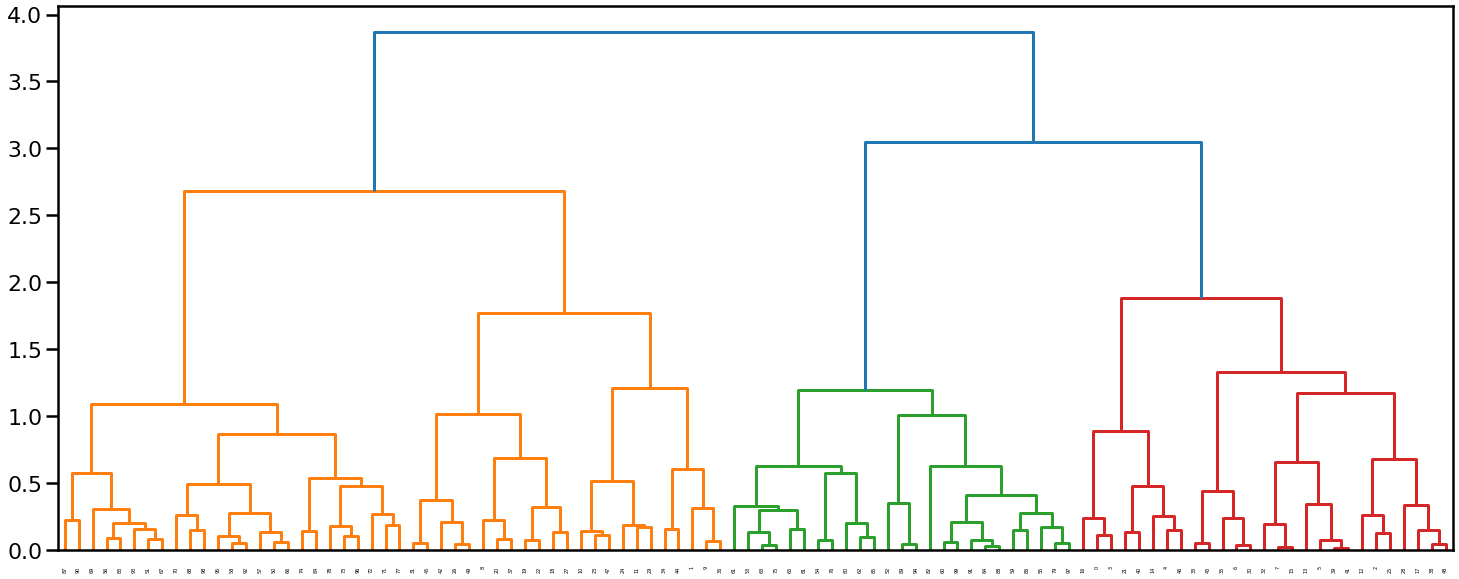

In [9]:
clusters_toy_data_0_complete = clustering_complete.fit(test_data_0)
clustering_complete.plot_dendrogram()

Try the different linkage methods implemented in `sklearn`  and comment

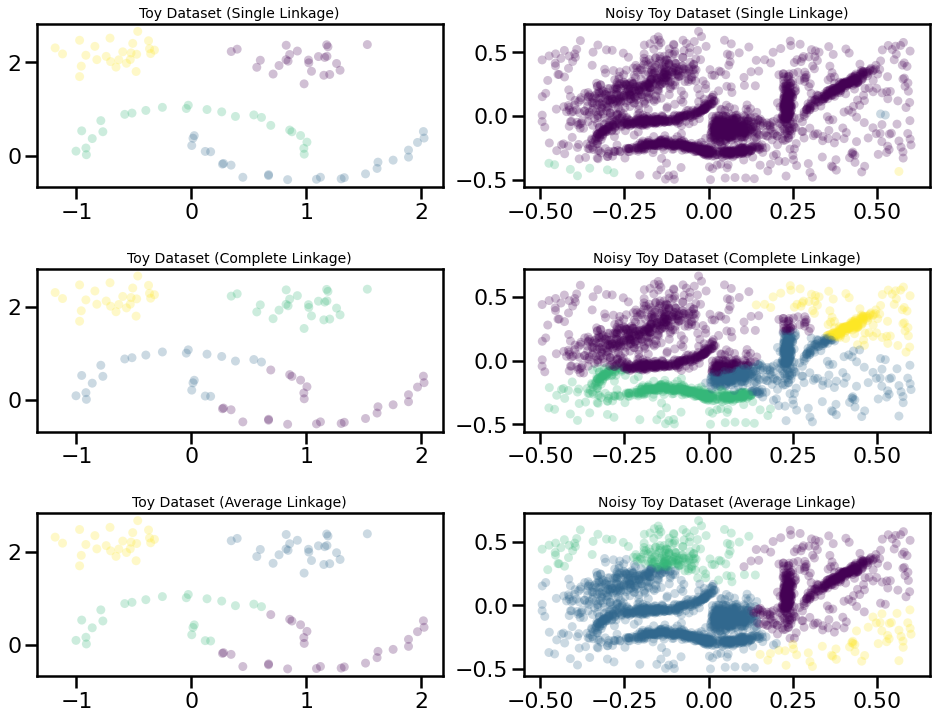

In [10]:
import numpy as np
import matplotlib.pyplot as plt



# Perform single linkage clustering
from sklearn.cluster import AgglomerativeClustering

clusters_toy_data_0 = AgglomerativeClustering(n_clusters=4, linkage='single').fit_predict(test_data_0)
clusters_toy_data_1 = AgglomerativeClustering(n_clusters=4, linkage='single').fit_predict(test_data_1)

# Perform complete linkage clustering
clusters_toy_data_0_complete = AgglomerativeClustering(n_clusters=4, linkage='complete').fit_predict(test_data_0)
clusters_toy_data_1_complete = AgglomerativeClustering(n_clusters=4, linkage='complete').fit_predict(test_data_1)

# Perform average linkage clustering
clusters_toy_data_0_average = AgglomerativeClustering(n_clusters=4, linkage='average').fit_predict(test_data_0)
clusters_toy_data_1_average = AgglomerativeClustering(n_clusters=4, linkage='average').fit_predict(test_data_1)

# Plot all three linkage types in one figure
fig, ax = plt.subplots(3, 2, figsize=(16, 12))

# Plot the toy dataset with single linkage
ax[0, 0].scatter(test_data_0.T[0], test_data_0.T[1], c=clusters_toy_data_0, **plot_kwds)
ax[0, 0].set_title('Toy Dataset (Single Linkage)', size=14)

# Plot the noisy toy dataset with single linkage
ax[0, 1].scatter(test_data_1.T[0], test_data_1.T[1], c=clusters_toy_data_1, **plot_kwds)
ax[0, 1].set_title('Noisy Toy Dataset (Single Linkage)', size=14)

# Plot the toy dataset with complete linkage
ax[1, 0].scatter(test_data_0.T[0], test_data_0.T[1], c=clusters_toy_data_0_complete, **plot_kwds)
ax[1, 0].set_title('Toy Dataset (Complete Linkage)', size=14)

# Plot the noisy toy dataset with complete linkage
ax[1, 1].scatter(test_data_1.T[0], test_data_1.T[1], c=clusters_toy_data_1_complete, **plot_kwds)
ax[1, 1].set_title('Noisy Toy Dataset (Complete Linkage)', size=14)

# Plot the toy dataset with average linkage
ax[2, 0].scatter(test_data_0.T[0], test_data_0.T[1], c=clusters_toy_data_0_average, **plot_kwds)
ax[2, 0].set_title('Toy Dataset (Average Linkage)', size=14)

# Plot the noisy toy dataset with average linkage
ax[2, 1].scatter(test_data_1.T[0], test_data_1.T[1], c=clusters_toy_data_1_average, **plot_kwds)
ax[2, 1].set_title('Noisy Toy Dataset (Average Linkage)', size=14)


# Adjust the subplot spacing
plt.subplots_adjust(hspace=0.5)

# Show the plot
plt.show()


The cluster plots for sklearn package and my custom class are same.

These are my observations: 

#### Single Linkage

Clean Data: The clean dataset with the single linkage method shows a clear separation of clusters following the nearest points, which is typical for this method. It forms long chains that can capture the continuity of the data.

Noisy data: With noise added, the single linkage method is visibly affected. The chains become erratic, and the method seems to have difficulty discerning the true clusters from the noise, leading to less distinct cluster formations.

#### Complete Linkage

Clean Data: The clean dataset with the complete linkage method shows well-separated, compact clusters. This is indicative of the complete linkage's tendency to avoid chaining and form tighter clusters.

Noisy Data: With noise, the complete linkage method still maintains a degree of separation between clusters but becomes less distinct. It is less affected by noise than single linkage because it considers the maximum distance between points in a cluster, which can help in mitigating the effect of noise.

#### Average Linkage

Clean Data: The clean dataset with average linkage shows clusters that are not as compact as complete linkage but more coherent than single linkage, striking a balance between the chaining effect and compactness.

Noisy Data: With noise, the average linkage method shows some resilience. The clusters remain more intact compared to single linkage, suggesting that average linkage is somewhat robust to noise as it considers all inter-cluster distances.

## DBSCAN

DBSCAN is a density based algorithm -- it assumes clusters for dense regions. It is also the first actual clustering algorithm we've looked at: it doesn't require that every point be assigned to a cluster and hence doesn't partition the data, but instead extracts the 'dense' clusters and leaves sparse background classified as 'noise'. In practice DBSCAN is related to agglomerative clustering. As a first step DBSCAN transforms the space according to the density of the data: points in dense regions are left alone, while points in sparse regions are moved further away. Applying single linkage clustering to the transformed space results in a dendrogram, which we cut according to a distance parameter (called epsilon or `eps` in many implementations) to get clusters. Importantly any singleton clusters at that cut level are deemed to be 'noise' and left unclustered. 

Apply it to the test_data, how do you tune the parameters?

#### Comments: 

DBSCAN is best when used with noisy data, so we are going to look at how DBSCAN performs on noisy data with various hyperparameters. 

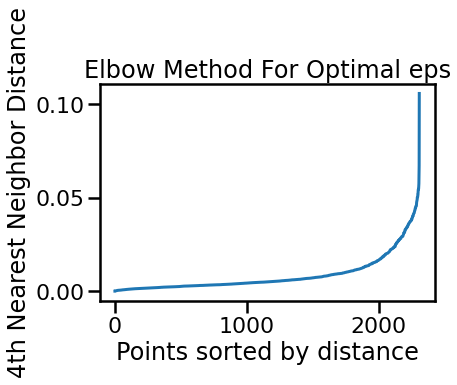

In [11]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler



# Use NearestNeighbors to find the k-distance graph
neigh = NearestNeighbors(n_neighbors=4)  # Use 4 since min_samples starts at 4
nbrs = neigh.fit(test_data_1)
distances, indices = nbrs.kneighbors(test_data_1)

# Sort distances
distances = np.sort(distances, axis=0)
distances = distances[:, 1]  # Take the distance to the first nearest neighbor

# Plot the elbow graph
plt.plot(distances)
plt.title('Elbow Method For Optimal eps')
plt.xlabel('Points sorted by distance')
plt.ylabel('4th Nearest Neighbor Distance')


plt.show()


From the elbow plot, ideal eps value should range between 0.1 and 0.2. 

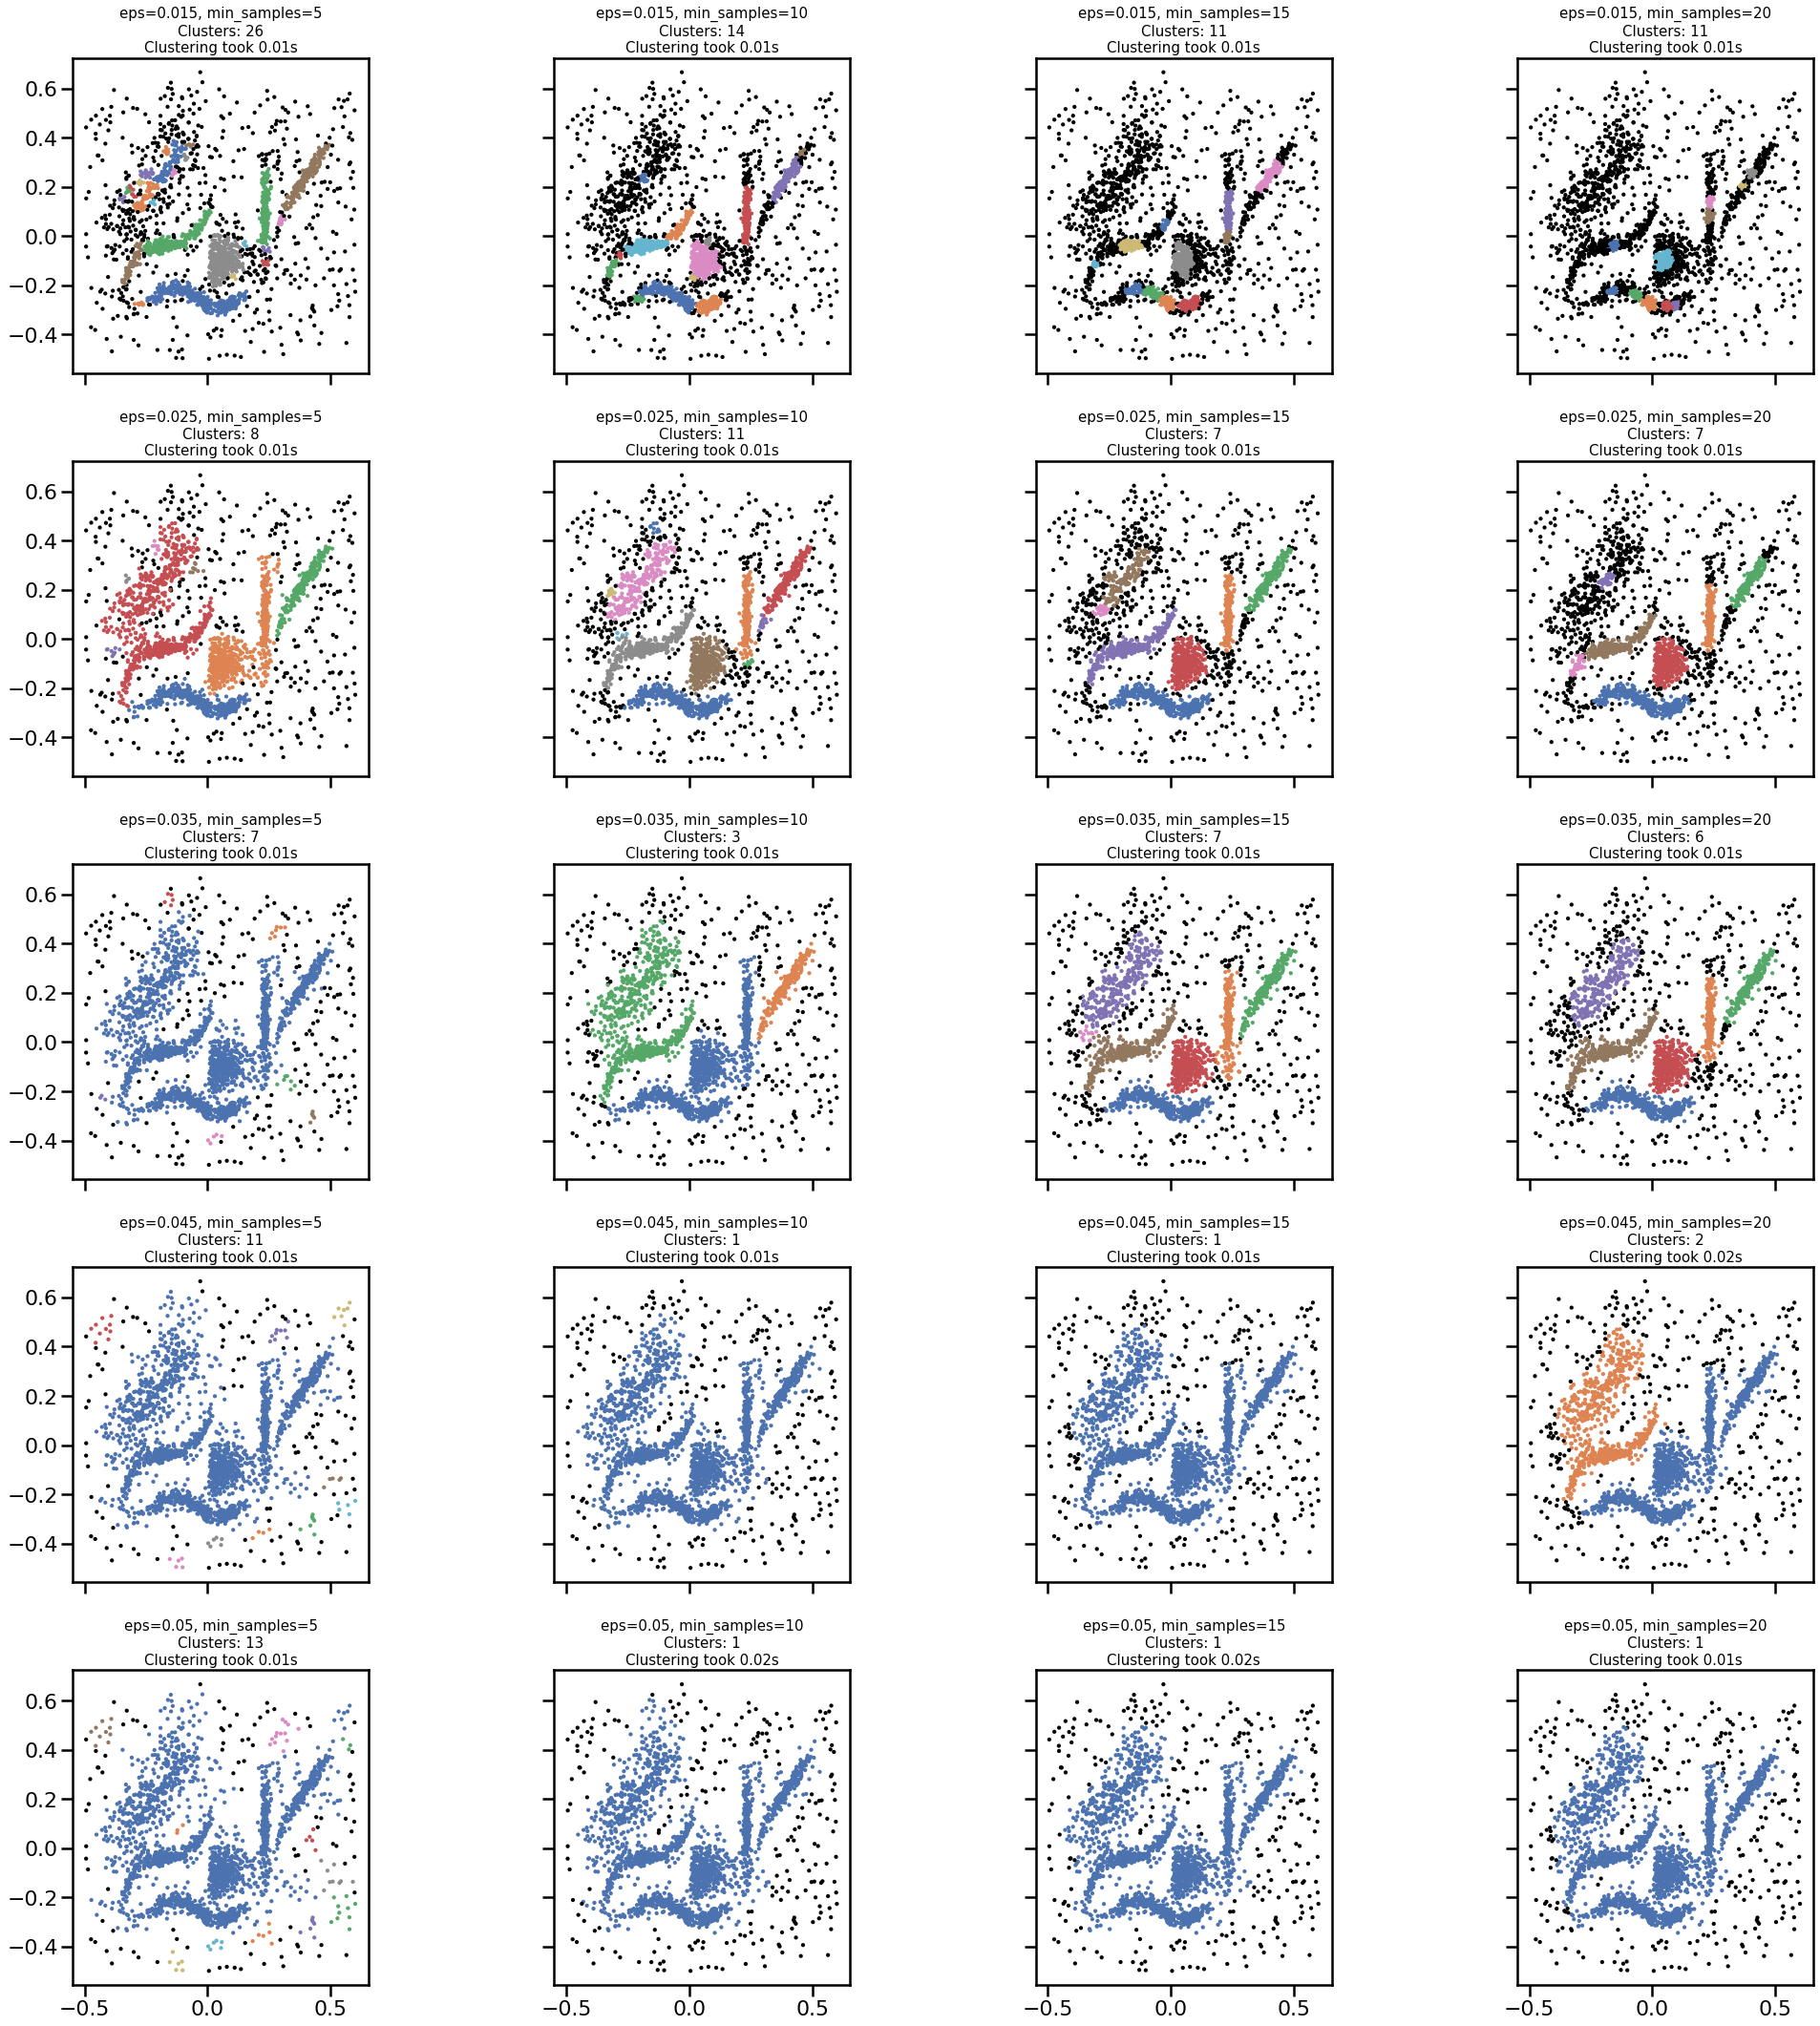

In [12]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import time
%matplotlib inline
sns.set_context('poster')
sns.set_color_codes()


eps_values = [0.015, 0.025, 0.035, 0.045,  0.05]  # Example eps values
min_samples_values = [5, 10, 15, 20]     # Example min_samples values



fig, axs = plt.subplots(len(eps_values), len(min_samples_values), figsize=(30, 30), sharex=True, sharey=True)

# Plot the DBSCAN results for each combination of eps and min_samples
for i, eps in enumerate(eps_values):
    for j, min_samples in enumerate(min_samples_values):
        
        start_time = time.time()
        db = DBSCAN(eps=eps, min_samples= min_samples).fit(test_data_1)
        end_time = time.time()
        
        palette = sns.color_palette('deep', np.unique(db.labels_).max() + 1)
        colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in db.labels_]
        
        # Calculate the number of clusters (excluding noise)
        n_clusters_ = len(set(db.labels_)) - (1 if -1 in db.labels_ else 0)
        
        axs[i, j].scatter(test_data_1[:, 0], test_data_1[:, 1], c=colors, cmap='plasma', s=5)

        axs[i, j].set_title(f'eps={eps}, min_samples={min_samples}\nClusters: {n_clusters_}\nClustering took {end_time - start_time:.2f}s', fontsize=15)  # Set a smaller font size here
        axs[i, j].set_aspect('equal')


plt.tight_layout()
plt.show()


- eps = 0.025, min_samples = 15 
- eps = 0.035, min_samples = 15
- eps = 0.035, min_samples = 20 

These hyperparameters show visually promising results. 

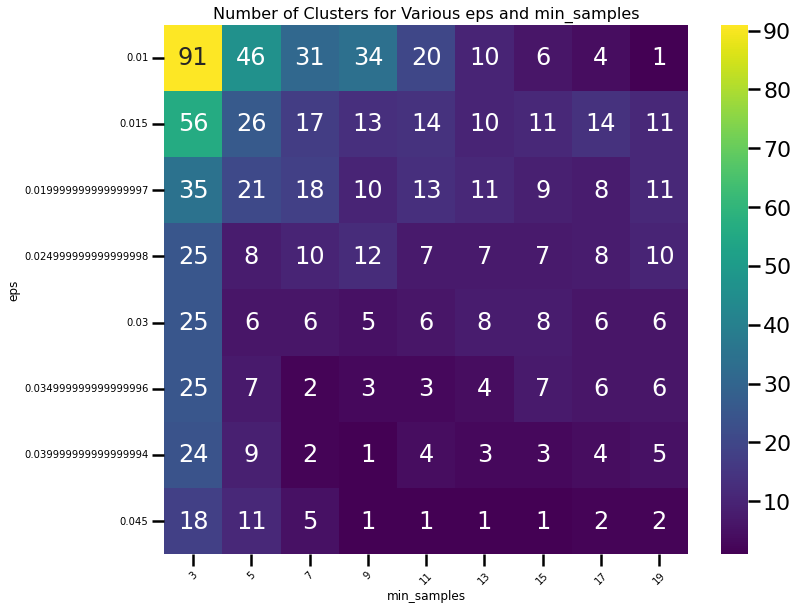

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt


eps_values = np.arange(0.01, 0.05, 0.005)  
min_samples_values = np.arange(3, 20, 2)  

cluster_counts = np.zeros((len(eps_values), len(min_samples_values)))

for i, eps in enumerate(eps_values):
    for j, min_samples in enumerate(min_samples_values):
        db = DBSCAN(eps=eps, min_samples=min_samples).fit(test_data_1)
        n_clusters_ = len(set(db.labels_)) - (1 if -1 in db.labels_ else 0)
        cluster_counts[i, j] = n_clusters_

df = pd.DataFrame(cluster_counts, index=eps_values, columns=min_samples_values)

plt.figure(figsize=(12, 9))  

ax = sns.heatmap(df, annot=True, fmt=".0f", cmap="viridis")

# Adjust the appearance
ax.set_title('Number of Clusters for Various eps and min_samples', fontsize=16)
ax.set_xlabel('min_samples', fontsize=12)
ax.set_ylabel('eps', fontsize=12)
ax.tick_params(axis='x', labelsize=10, rotation=45)  
ax.tick_params(axis='y', labelsize=10, rotation=0)  
plt.tight_layout()  
plt.show()

#### Comments

- The highest number of clusters are observed for lower eps values and lower min_samples. Lower eps values mean that points are considered neighbors over smaller distances, which can lead to more clusters being detected when combined with a smaller min_samples because it's easier for points to form small, dense regions that are considered separate clusters.

- Conversely, for larger eps values, number of clusters drop drastically across different min_samples values, This could mean that the data points are now all being grouped into a few large clusters

- The ideal parameters likely lie in the middle to higher end of the eps values and the middle to upper end of min_samples values where we see a transition from multiple clusters to single clusters. This might be where DBSCAN is accurately capturing the underlying structure of the data without over-segmenting or under-segmenting it.

## HDBSCAN

HDBSCAN is a recent algorithm developed by some of the same people who write the original DBSCAN paper. Their goal was to allow varying density clusters. The algorithm starts off much the same as DBSCAN: we transform the space according to density, exactly as DBSCAN does, and perform single linkage clustering on the transformed space. Instead of taking an epsilon value as a cut level for the dendrogram however, a different approach is taken: the dendrogram is condensed by viewing splits that result in a small number of points splitting off as points 'falling out of a cluster'. This results in a smaller tree with fewer clusters that 'lose points'. That tree can then be used to select the most stable or persistent clusters. This process allows the tree to be cut at varying height, picking our varying density clusters based on cluster stability.

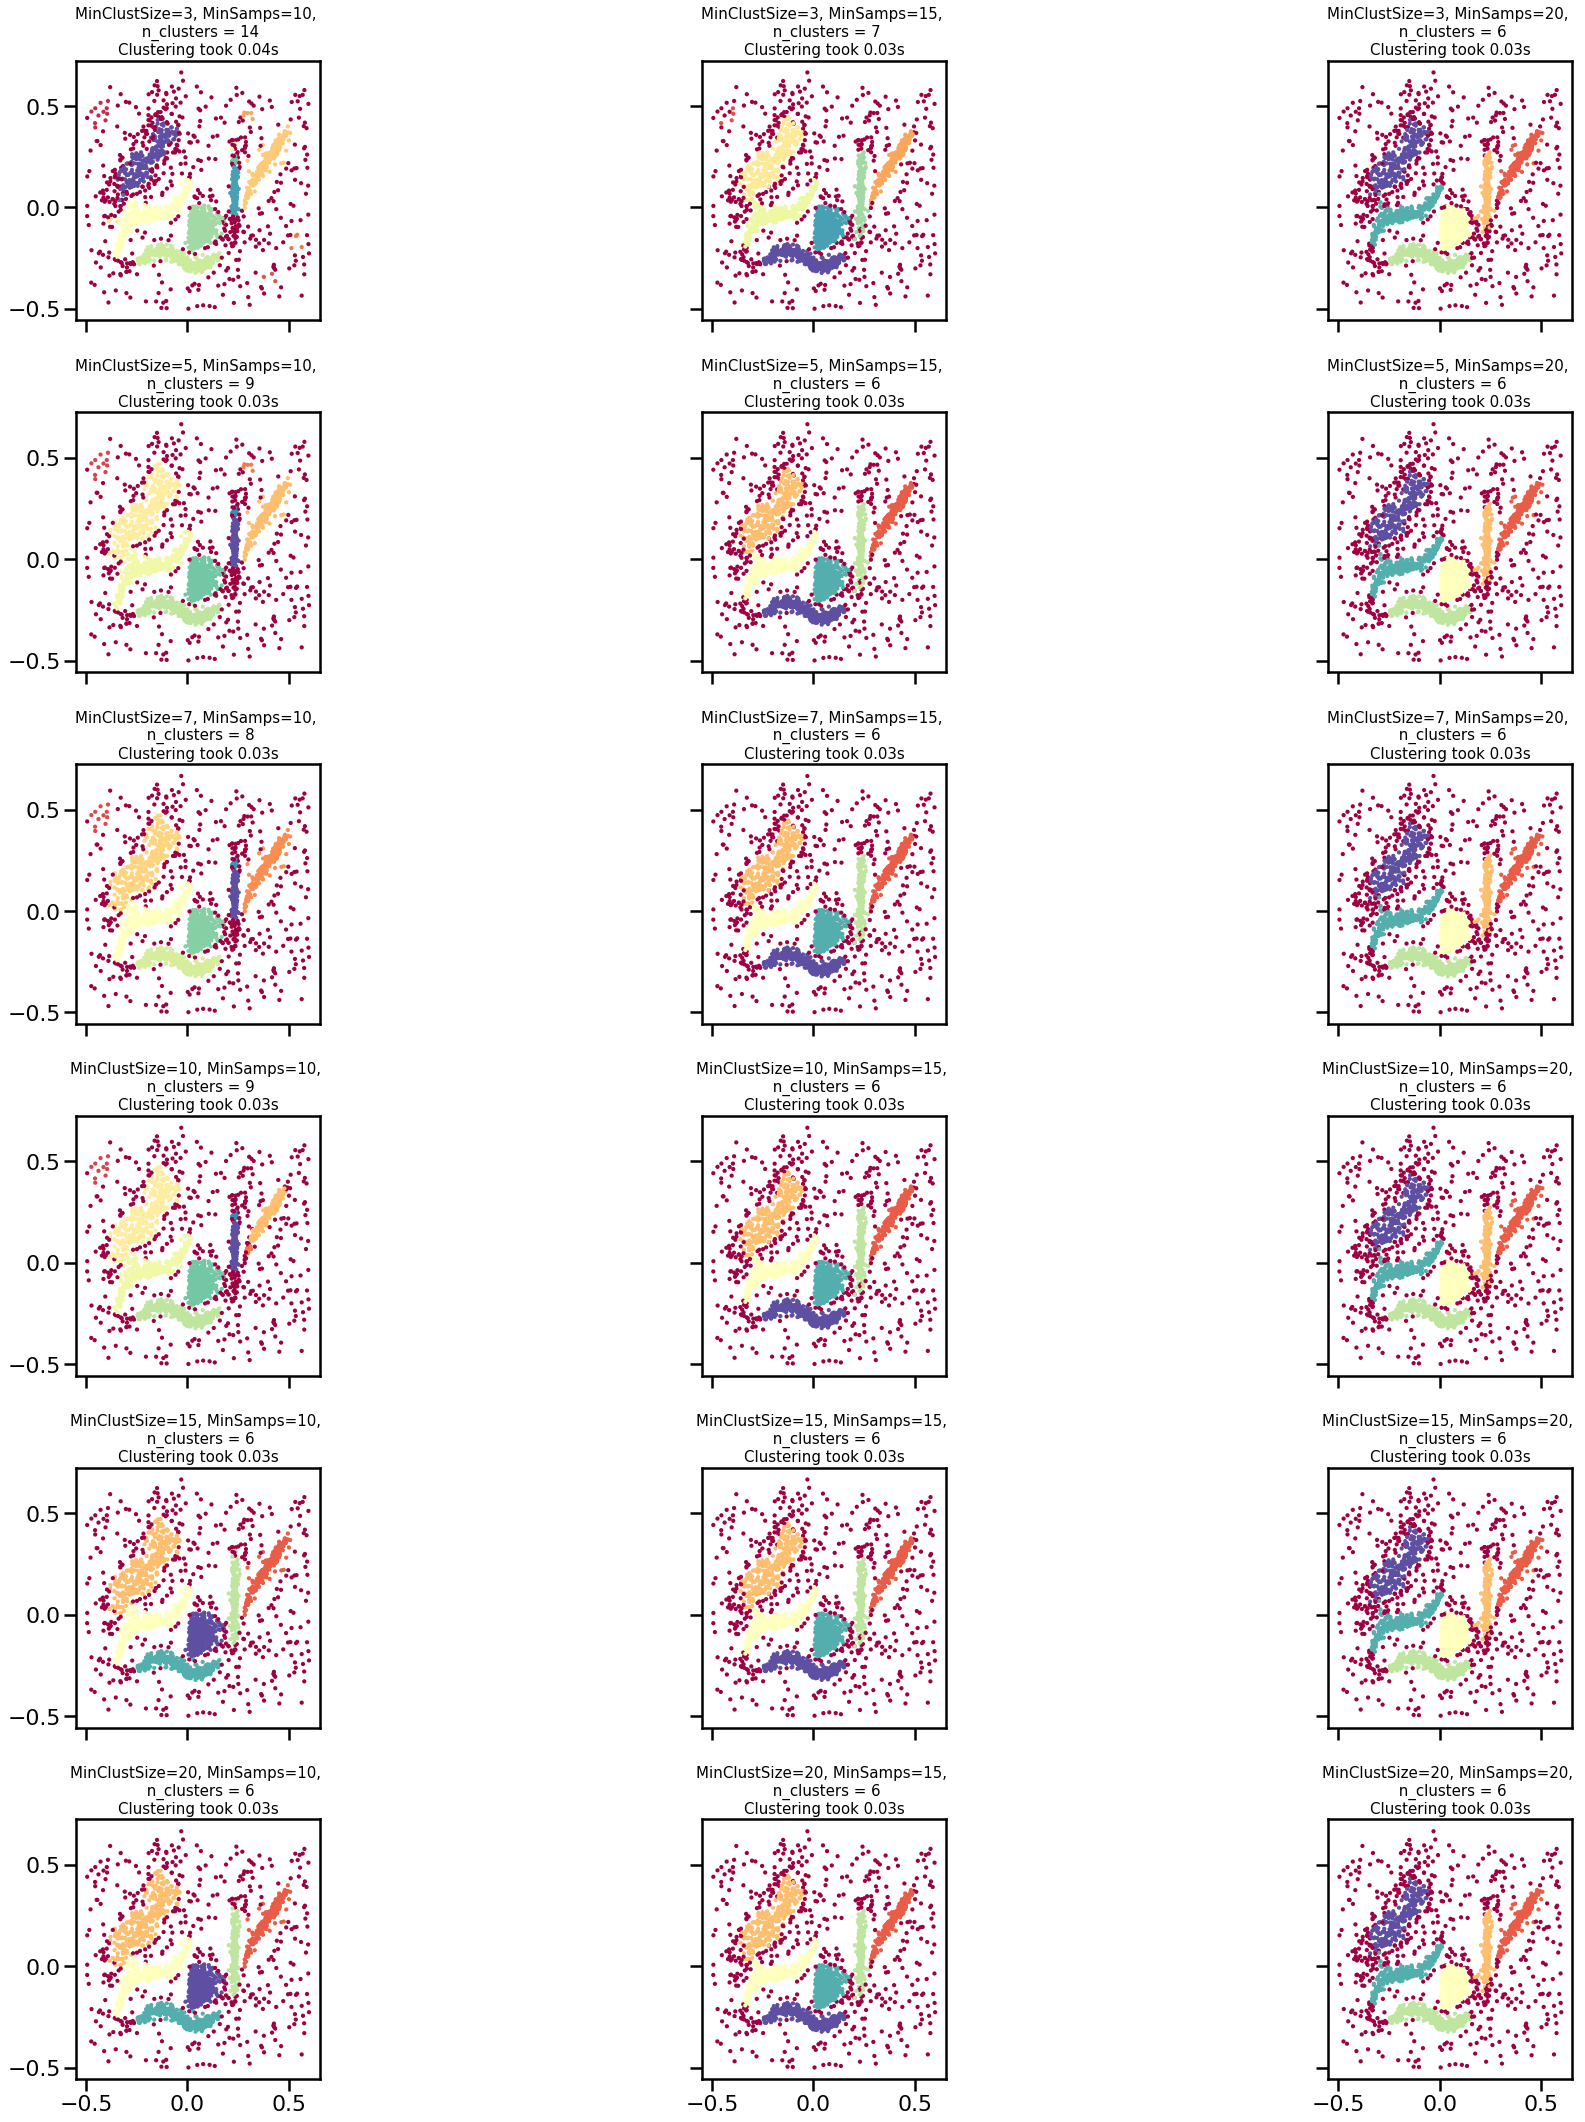

In [14]:
import matplotlib.pyplot as plt
import hdbscan
import numpy as np


# Define ranges for the parameters
min_cluster_sizes = [3, 5, 7, 10 , 15, 20]  # Example min_cluster_size values
min_samples_values = [10, 15, 20]  # Example min_samples values

# Create the subplots
fig, axs = plt.subplots(len(min_cluster_sizes), len(min_samples_values), figsize=(30, 30), sharex=True, sharey=True)

# Plot the HDBSCAN results for each combination of min_cluster_size and min_samples
for i, min_cluster_size in enumerate(min_cluster_sizes):
    for j, min_samples in enumerate(min_samples_values):
        # Apply HDBSCAN with the current min_cluster_size and min_samples
        
        start_time = time.time()
        clusterer = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size, min_samples=min_samples).fit(test_data_1)
        end_time = time.time()
        
        # Scatter plot for the clusters
        axs[i, j].scatter(test_data_1[:, 0], test_data_1[:, 1], c=clusterer.labels_, cmap='Spectral', s=5)
        
        # Count the number of clusters excluding noise
        n_clusters_ = len(set(clusterer.labels_)) - (1 if -1 in clusterer.labels_ else 0)
        
        # Set the title with the number of clusters
        axs[i, j].set_title(f'MinClustSize={min_cluster_size}, MinSamps={min_samples}, \n n_clusters = {n_clusters_}\nClustering took {end_time - start_time:.2f}s', fontsize=15)
        axs[i, j].set_aspect('equal')

# Adjust the layout
plt.tight_layout()
plt.show()


Almost all the results are visually stunning! HDBSCAN performs really well. 

#### Comments

- There is not much variance with the MinSamps in this range
- HDBSCAN shows very good stability over various parameters choices
- If I were to choose a parameter, I would go with MinClustSize = 15 and MinSampls = 15. Its is both time efficient and visually good clustering.

Let's look at a comparision between the best parameters from various clustering algorithms

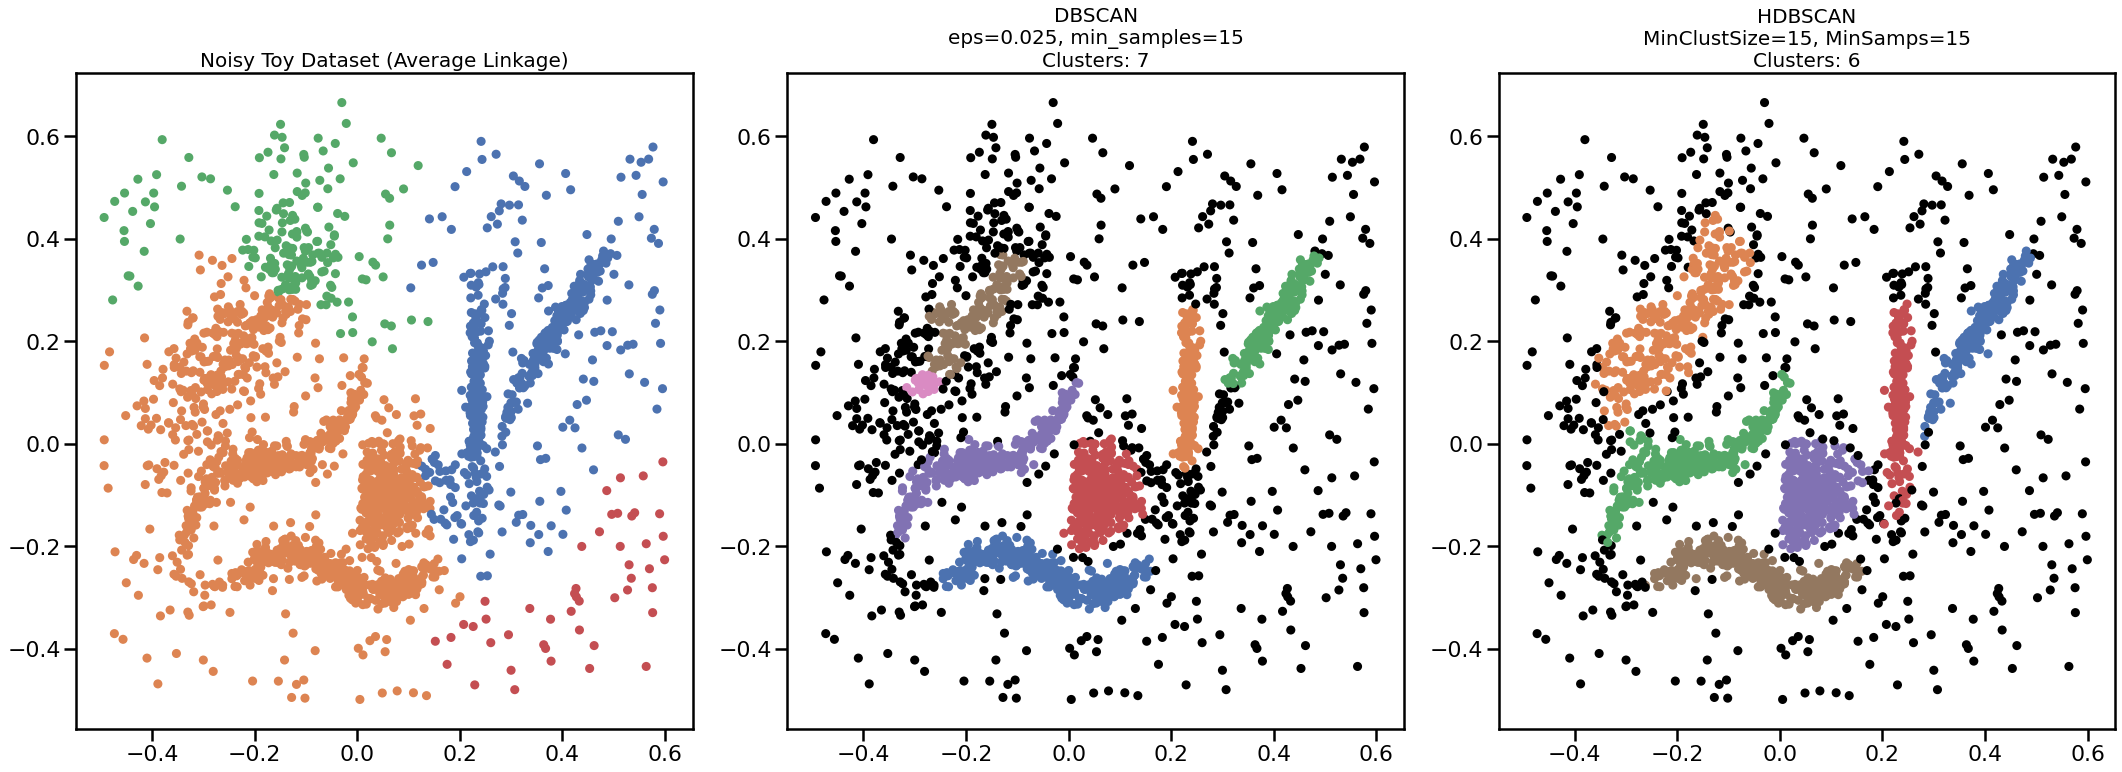

In [15]:
import numpy as np
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
import hdbscan
import matplotlib.pyplot as plt


fig, axs = plt.subplots(1, 3, figsize=(30,30)) 




#Average Linkage
clusters_toy_data_1_average = AgglomerativeClustering(n_clusters=4, linkage='average').fit_predict(test_data_1)
palette = sns.color_palette('deep', np.unique(clusters_toy_data_1_average).max() + 1)
colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in clusters_toy_data_1_average]
axs[0].scatter(test_data_1[:, 0], test_data_1[:, 1], c=colors, s=50)  
axs[0].set_title('Noisy Toy Dataset (Average Linkage)', size=20)

# DBSCAN
eps = 0.025  
min_samples = 15  
db = DBSCAN(eps=eps, min_samples=min_samples).fit(test_data_1)
palette = sns.color_palette('deep', np.unique(db.labels_).max() + 1)
colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in db.labels_]
n_clusters_ = len(set(db.labels_)) - (1 if -1 in db.labels_ else 0)
axs[1].scatter(test_data_1[:, 0], test_data_1[:, 1], c=colors, s=50)
axs[1].set_title(f'DBSCAN\neps={eps}, min_samples={min_samples}\nClusters: {n_clusters_}', fontsize=20)

# HDBSCAN
min_cluster_size = 15 
min_samples = 15  
clusterer = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size, min_samples=min_samples).fit(test_data_1)
palette = sns.color_palette('deep', np.unique(clusterer.labels_).max() + 1)
colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in clusterer.labels_]
n_clusters_ = len(set(clusterer.labels_)) - (1 if -1 in clusterer.labels_ else 0)
axs[2].scatter(test_data_1[:, 0], test_data_1[:, 1], c=colors, s=50)
axs[2].set_title(f'HDBSCAN\nMinClustSize={min_cluster_size}, MinSamps={min_samples}\nClusters: {n_clusters_}', fontsize=20)


for ax in axs:
    ax.set_aspect('equal')

# Layout adjustment
plt.tight_layout()
plt.show()


## Apply the algorithms to the following images and comment the results

### NASA Curiosity Picture

- Look at following NASA photo taken by a robot in mars:


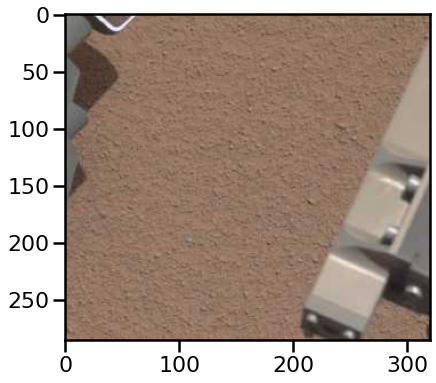

In [16]:
from PIL import Image

Im_1  = Image.open('im_nasa_reduced.jpg')

fig = plt.figure(figsize=(8, 6))
plt.imshow(Im_1)
plt.show()

- Transform the image to an intensity (I) and saturation (S) representation, it helps to distinguish bright and textures.

$$I=\frac{R+G+B}{3}$$
$$S=1-I\times min(R, G, B)$$

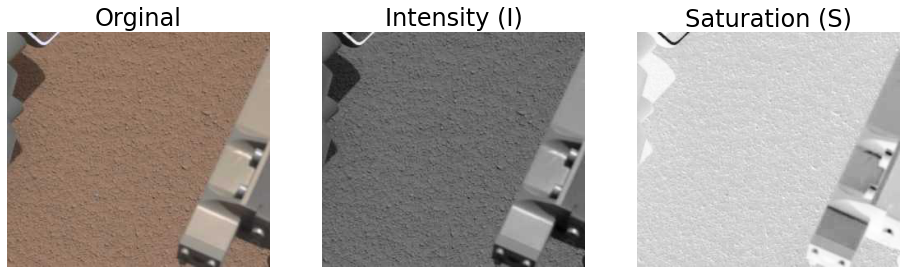

In [17]:
# Convert the image to a NumPy array
im_array = np.array(Im_1)

I = np.mean(im_array.astype(np.float64) / 255, axis=2)

# Calculate saturation (S)
# Min along the third axis (color channel) and convert to float to avoid overflow
min_rgb = np.min(im_array.astype(np.float64) / 255, axis=2)
S = 1 - (I * min_rgb)

# Display the images
fig, axs = plt.subplots(1, 3, figsize=(16, 6))


axs[0].imshow(Im_1, cmap='gray')
axs[0].set_title('Orginal')
axs[0].axis('off') 

# Display intensity
axs[1].imshow(I, cmap='gray')
axs[1].set_title('Intensity (I)')
axs[1].axis('off') 

# Display saturation
axs[2].imshow(S, cmap='gray')
axs[2].set_title('Saturation (S)')
axs[2].axis('off')  

plt.show()


- Apply the seen algorithms to segment the image in the Intensity-Saturation representation, comment the results and check if you find something on mars' surface. Be careful with hdbscan and memory errors for some parameters choice (use algorithm='boruvka_kdtree').

(-0.5, 319.5, 285.5, -0.5)

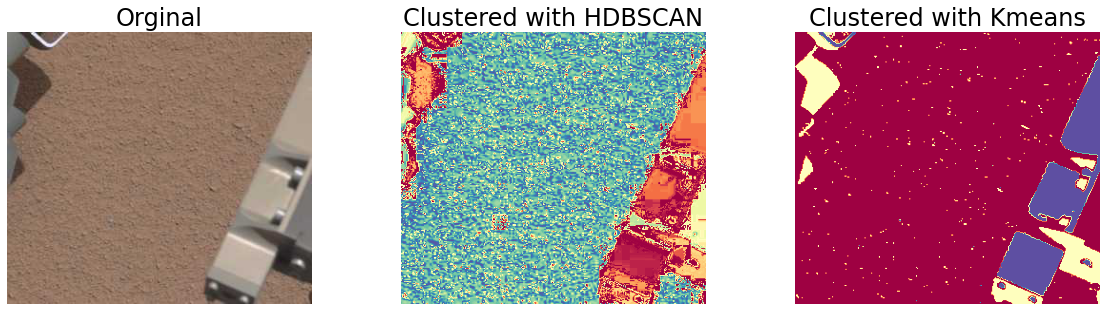

In [37]:
# Prepare the data for clustering
IS_data = np.stack((I.flatten(), S.flatten()), axis=-1)
scaler = StandardScaler()
IS_data_scaled = scaler.fit_transform(IS_data) 

fig, axs = plt.subplots(1, 4, figsize=(20, 5))

axs[0].imshow(Im_1, cmap='gray')
axs[0].set_title('Orginal')
axs[0].axis('off') 

# Apply HDBSCAN
hdb = hdbscan.HDBSCAN(min_cluster_size=15, min_samples=15, algorithm='boruvka_kdtree')
hdb_labels = hdb.fit_predict(IS_data_scaled).reshape(I.shape)


# Display HDBSCAN result
axs[1].imshow(hdb_labels, cmap='Spectral')
axs[1].set_title('Clustered with HDBSCAN')
axs[1].axis('off') 


# Apply KMeans clustering
kmeans = KMeans(n_clusters=3)
kmeans_labels = kmeans.fit_predict(IS_data_scaled).reshape(I.shape)

axs[2].imshow(kmeans_labels, cmap='Spectral')
axs[2].set_title('Clustered with Kmeans')
axs[2].axis('off')

# Apply Agglomerative clustering
kmeans = KMeans(n_clusters=3)
kmeans_labels = kmeans.fit_predict(IS_data_scaled).reshape(I.shape)

axs[2].imshow(kmeans_labels, cmap='Spectral')
axs[2].set_title('Clustered with Kmeans')
axs[2].axis('off')

import numpy as np
import matplotlib.pyplot as plt



# Perform single linkage clustering
from sklearn.cluster import AgglomerativeClustering

agglom = AgglomerativeClustering(n_clusters=4, linkage='single').fit_predict(test_data_0)
clusters_toy_data_1 = AgglomerativeClustering(n_clusters=4, linkage='single').fit_predict(test_data_1)

# Perform complete linkage clustering
clusters_toy_data_0_complete = AgglomerativeClustering(n_clusters=4, linkage='complete').fit_predict(test_data_0)
clusters_toy_data_1_complete = AgglomerativeClustering(n_clusters=4, linkage='complete').fit_predict(test_data_1)

# Perform average linkage clustering
clusters_toy_data_0_average = AgglomerativeClustering(n_clusters=4, linkage='average').fit_predict(test_data_0)
clusters_toy_data_1_average = AgglomerativeClustering(n_clusters=4, linkage='average').fit_predict(test_data_1)

# Plot all three linkage types in one figure
fig, ax = plt.subplots(3, 2, figsize=(16, 12))

# Plot the toy dataset with single linkage
ax[0, 0].scatter(test_data_0.T[0], test_data_0.T[1], c=clusters_toy_data_0, **plot_kwds)
ax[0, 0].set_title('Toy Dataset (Single Linkage)', size=14)

Using HDBSCAN and Kmeans, we clustered the NASA Curiosity image. 
- We can clearly see that both the algorithms were efficient in capturing the Robot's body part in the picture. 
- We can clearly differentiate from the Robot's part and Mars surface using basic image clustering algorithms. 
- Interestingly, we can also see them capturing the shadow of the robot

### Color compression

One interesting application of clustering is in color compression within images. 
For example, imagine you have an image with millions of colors.
In most images, a large number of the colors will be unused, and many of the pixels in the image will have similar or even identical colors.

Get a simplified 10-colored version of the following image by applying k-means. Plot both images.

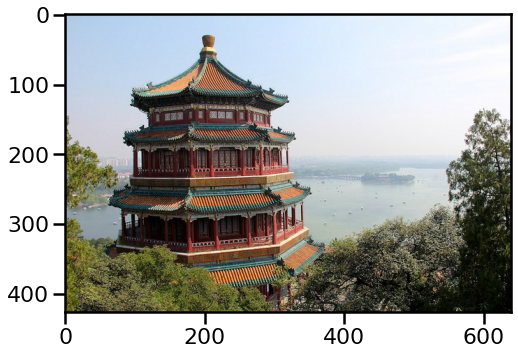

In [20]:
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")

fig = plt.figure(figsize=(8, 6))
plt.imshow(china);

- First, we have to reshape our image into 2D array with corresponding pixel values for R,G,B channels
- Applying K-means on this 2D array for 10 clusters will form 10 centroids and all the related colour values around these centroids. 
- So, when we replace each pixel's color in the original image with the nearest centroid color, we effectively reduce the image's color palette to the 10 most representative colors.


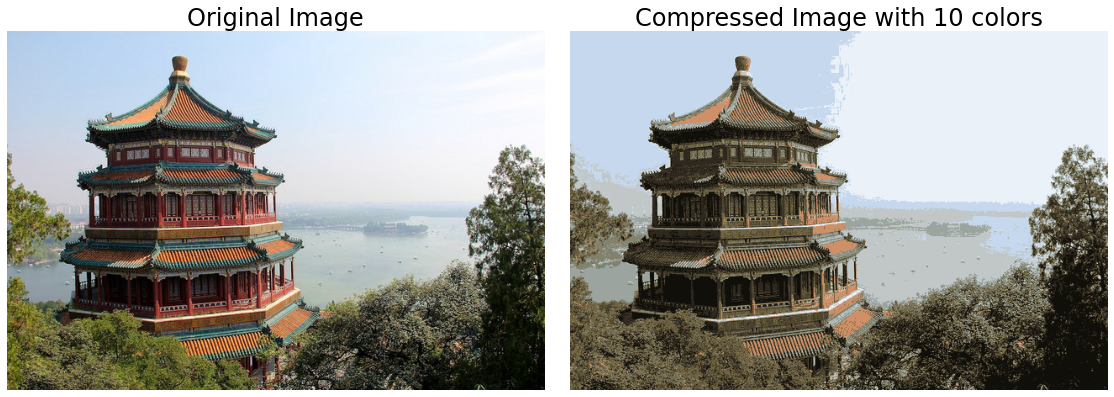

In [21]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_sample_image
from sklearn.cluster import KMeans
import numpy as np


fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].imshow(china)
ax[0].set_title('Original Image')
ax[0].axis('off')

# Reshape the image to a 2D array of pixels and 3 color values (RGB)
china_reshaped = china.reshape((-1, 3))


kmeans = KMeans(n_clusters=10)
china_kmeans = kmeans.fit_predict(china_reshaped)

# Replace each pixel's color with the center of its assigned cluster
china_compressed = kmeans.cluster_centers_[china_kmeans].astype('uint8')

# Reshape back to the original image's shape
china_compressed = china_compressed.reshape(china.shape)

# Display the compressed image
ax[1].imshow(china_compressed)
ax[1].set_title('Compressed Image with 10 colors')
ax[1].axis('off')

plt.tight_layout()
plt.show()
